In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import skimage.io as im

%matplotlib inline

In [2]:
face = im.imread('data/man.png', as_gray=True)
mean = face.mean(axis=0)

In [3]:
V, D, U = np.linalg.svd(face-mean, full_matrices=False)

In [4]:
V.shape, D.shape, U.shape

((360, 360), (360,), (360, 480))

In [5]:
V @ np.diag(D) @ U

array([[-0.03534322, -0.03526522, -0.03578199, ...,  0.41956251,
         0.42084052,  0.42134706],
       [-0.03534322, -0.03526522, -0.03578199, ...,  0.41956251,
         0.42084052,  0.42134706],
       [-0.03534322, -0.03526522, -0.03578199, ...,  0.41956251,
         0.42084052,  0.42134706],
       ...,
       [-0.17473302, -0.17465503, -0.17125022, ..., -0.31288768,
        -0.30685477, -0.29850509],
       [-0.17473302, -0.17465503, -0.17517179, ..., -0.26975043,
        -0.27940379, -0.27889725],
       [-0.17473302, -0.17465503, -0.17517179, ..., -0.21484847,
        -0.25587438, -0.27889725]])

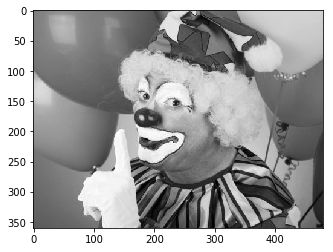

In [6]:
plt.imshow(face, cmap=plt.cm.gray)

In [7]:
k = 20

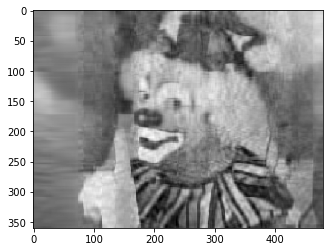

In [8]:
plt.imshow(V[:,:k] @ np.diag(D[:k]) @ U[:k, :], cmap=plt.cm.gray)

In [9]:
import sklearn.neighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
faces = np.load('data/faces.npy')
mean = faces.mean(axis=0)

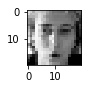

In [11]:
plt.figure(figsize=(2,1))
plt.imshow(faces[1].reshape((20, 20)), cmap=plt.cm.gray)

In [12]:
pca = PCA(n_components=40)

In [13]:
pca.fit(faces - mean)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
new_faces = pca.transform(faces)

In [15]:
new_faces.shape

(8832, 40)

In [16]:
kde = sklearn.neighbors.KernelDensity()

In [17]:
kde.fit(new_faces)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

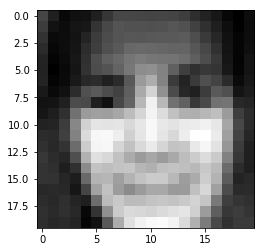

In [18]:
s = kde.sample() 
new_face = pca.inverse_transform(s)
plt.imshow((new_face + mean).reshape((20, 20)), cmap=plt.cm.gray)